In [67]:
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn 
import pandas as pd 
import numpy as np
import scipy.stats as st

## loading the dataset :

In [8]:
data = pd.read_excel('Dataset.xlsx',sheet_name=[0,1])

In [9]:
df = data[1]

In [11]:
df1 = data[0]

In [12]:
df1

,GRIP,ARM,RATINGS,SIMS
0,105.5,80.5,31.8,1.18
1,106.5,93.0,39.8,0.94
2,94.0,81.0,46.8,0.84
3,90.5,33.5,52.2,-2.45
4,104.0,47.5,31.2,1.00
...,...,...,...,...
270,105.0,73.0,51.4,-0.15
271,113.0,87.0,49.1,-0.25
272,133.5,96.5,44.6,2.27
273,89.5,63.5,37.8,-0.93


In [10]:
df

,GRIP,ARM,RATINGS,SIMS
0,105.5,80.5,31.8,1.18
1,106.5,93.0,39.8,0.94
2,94.0,81.0,46.8,0.84
3,90.5,33.5,52.2,-2.45
4,104.0,47.5,31.2,1.00
...,...,...,...,...
555,113.0,87.0,49.1,-0.25
556,133.5,96.5,44.6,2.27
557,89.5,63.5,37.8,-0.93
558,95.0,70.0,35.4,-0.58


## We will be using the second sheet since it is mentioned in the Case Study that  :

   - ' The data collected in this case study involved 560 individuals working in physically demanding jobs. '
   
   -   The second sheet excalty represents the description in the question . 

## Data Cleaning and Preparation:

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   GRIP     560 non-null    float64
 1   ARM      560 non-null    float64
 2   RATINGS  560 non-null    float64
 3   SIMS     560 non-null    float64
dtypes: float64(4)
memory usage: 17.6 KB


### The info above suggests that we dont need to impute for missing values , since there are no missing values in the data 

In [14]:
df.describe()

,GRIP,ARM,RATINGS,SIMS
count,560.000000,560.000000,560.000000,560.000000
mean,110.185714,80.030357,40.986082,0.214321
std,20.219577,17.845114,7.806317,2.520152
min,29.000000,19.000000,21.600000,-4.170000
25%,99.000000,69.500000,35.600000,-0.800000
50%,110.000000,82.500000,40.800000,0.030000
75%,121.500000,90.500000,47.125000,0.910000
max,189.000000,132.000000,57.200000,49.000000


<IPython.core.display.Javascript object>

<Axes: >

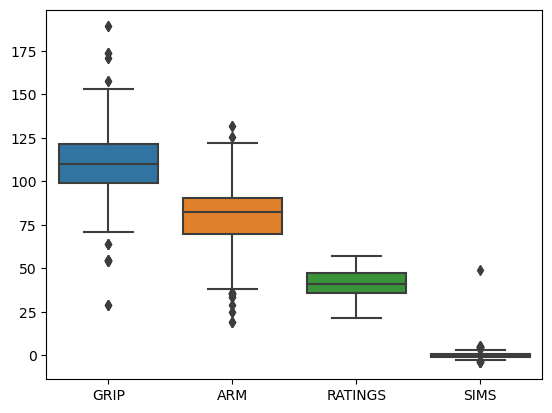

In [15]:
# checking for outliers :

sns.boxplot(data = df)

In [21]:
def outliers(x) : 
    Q3 = df[x].quantile(0.75)
    Q1 = df[x].quantile(0.25)
    print('the quantiles Q3 , Q1 for ', x ,' are ',Q3,Q1)
    IQR = Q3 - Q1
    print('IQR for ', x ,' IS ',IQR)
    UW = Q3 +(1.5*IQR)
    LW = Q1 -(1.5*IQR)
    print('Upper and Lower whiskers for ',x , 'are',UW,LW)
    return [Q3,Q1,IQR,UW,LW]

In [22]:
outs = dict()
for col in df.columns :
    outs[col] = outliers(col)

the quantiles Q3 , Q1 for  GRIP  are  121.5 99.0
IQR for  GRIP  IS  22.5
Upper and Lower whiskers for  GRIP are 155.25 65.25
the quantiles Q3 , Q1 for  ARM  are  90.5 69.5
IQR for  ARM  IS  21.0
Upper and Lower whiskers for  ARM are 122.0 38.0
the quantiles Q3 , Q1 for  RATINGS  are  47.125 35.6
IQR for  RATINGS  IS  11.524999999999999
Upper and Lower whiskers for  RATINGS are 64.4125 18.312500000000004
the quantiles Q3 , Q1 for  SIMS  are  0.91 -0.8
IQR for  SIMS  IS  1.71
Upper and Lower whiskers for  SIMS are 3.475 -3.365


In [24]:
df.describe()

,GRIP,ARM,RATINGS,SIMS
count,560.000000,560.000000,560.000000,560.000000
mean,110.185714,80.030357,40.986082,0.214321
std,20.219577,17.845114,7.806317,2.520152
min,29.000000,19.000000,21.600000,-4.170000
25%,99.000000,69.500000,35.600000,-0.800000
50%,110.000000,82.500000,40.800000,0.030000
75%,121.500000,90.500000,47.125000,0.910000
max,189.000000,132.000000,57.200000,49.000000


In [26]:
outs['SIMS']

[0.91, -0.8, 1.71, 3.475, -3.365]

###  From the boxplot of the data we can see that  GRIP , RATING , ARM has the natural variation in the data . But for SIMS there a value which lies very far from thet distribution.That value is more like an error in ,So we replace that OUTLIER with median (mean cannot be used due to outlier).

In [27]:
# That outlier in sims is the maximum value of the column.

In [30]:
df['SIMS'].max()

49.0

In [36]:
df['SIMS'] = df['SIMS'].replace(49.0 ,0.214321)

<IPython.core.display.Javascript object>

<Axes: >

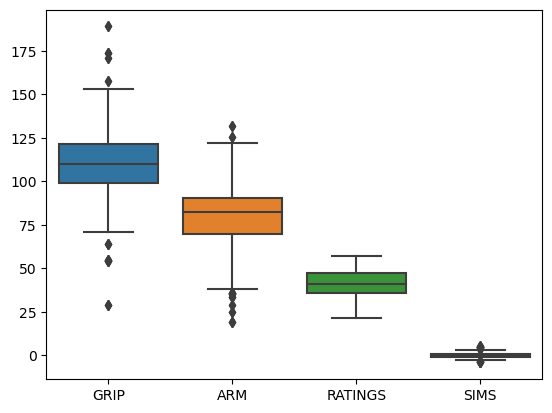

In [37]:
sns.boxplot(data = df)

## Exploratory Data Analysis (EDA):  the following techniques to used on the data.

 - Histograms (kde)
 
 - Scatterplots
 
 - REgression plots 
 
 - Heatmap (correlation)

## Histograms :

<IPython.core.display.Javascript object>

<Axes: xlabel='GRIP', ylabel='Count'>

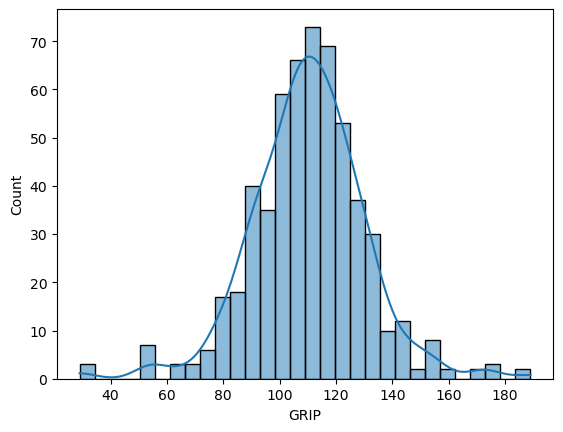

In [49]:
sns.histplot(x = 'GRIP', data = df, kde = True)

<IPython.core.display.Javascript object>

<Axes: xlabel='ARM', ylabel='Count'>

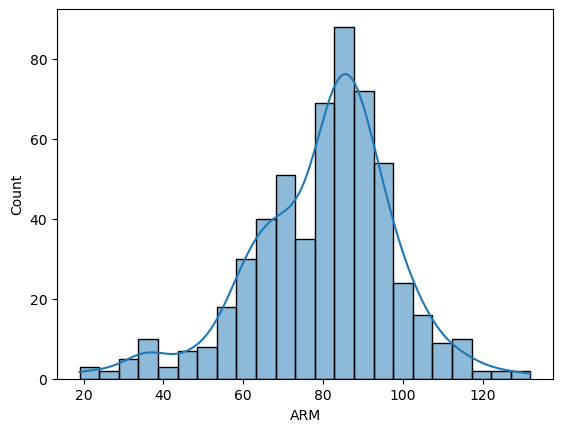

In [50]:
sns.histplot(x = 'ARM', data = df, kde = True)

<IPython.core.display.Javascript object>

<Axes: xlabel='RATINGS', ylabel='Count'>

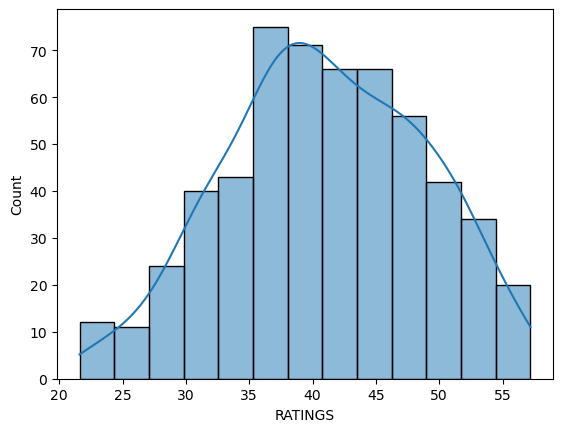

In [53]:
sns.histplot(x ='RATINGS', data = df, kde = True)

<IPython.core.display.Javascript object>

<Axes: xlabel='SIMS', ylabel='Count'>

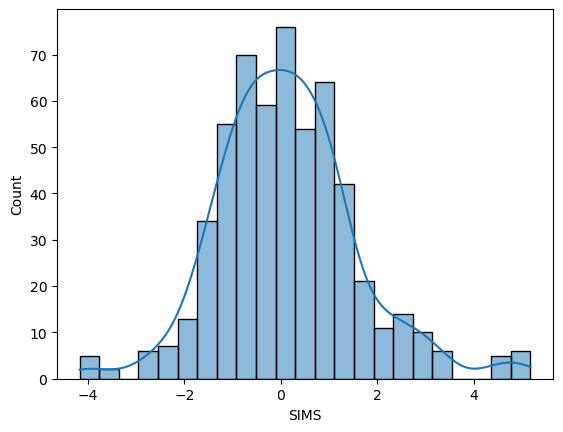

In [54]:
sns.histplot(x = 'SIMS', data = df, kde = True)

## Scatterplots : 

### for ARM : 

<IPython.core.display.Javascript object>

<Axes: xlabel='ARM', ylabel='GRIP'>

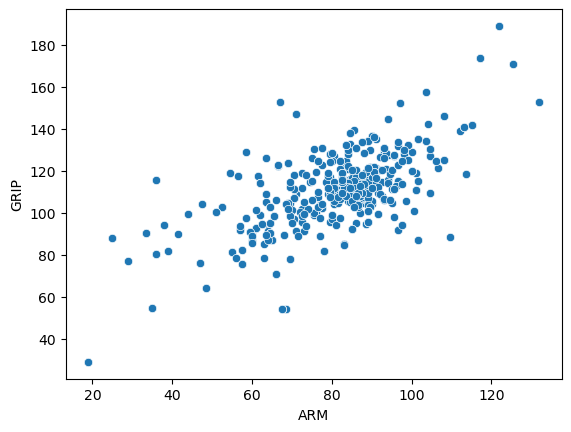

In [55]:
sns.scatterplot(x = 'ARM', y = 'GRIP', data = df)

<IPython.core.display.Javascript object>

<Axes: xlabel='ARM', ylabel='RATINGS'>

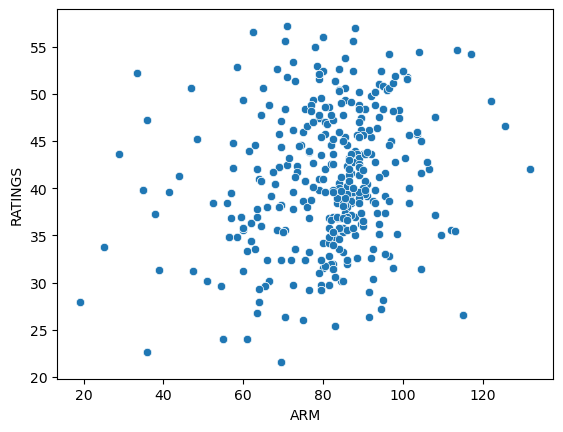

In [56]:
sns.scatterplot(x = 'ARM', y = 'RATINGS', data = df)

<IPython.core.display.Javascript object>

<Axes: xlabel='ARM', ylabel='SIMS'>

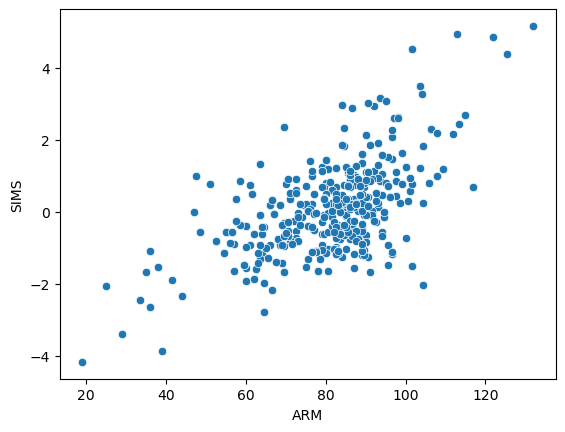

In [57]:
sns.scatterplot(x = 'ARM', y = 'SIMS', data = df)

# for Grip :

<IPython.core.display.Javascript object>

<Axes: xlabel='GRIP', ylabel='RATINGS'>

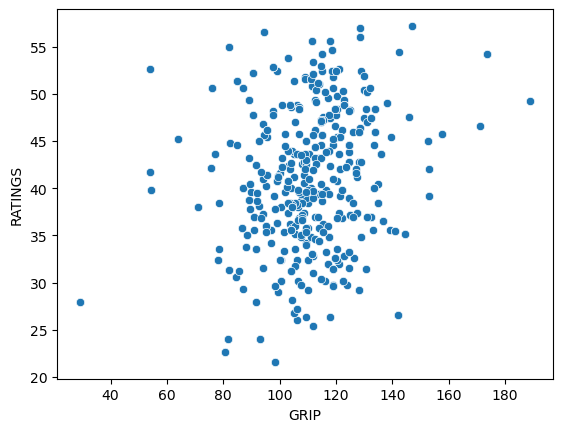

In [58]:
sns.scatterplot(x = 'GRIP', y = 'RATINGS', data = df)

<IPython.core.display.Javascript object>

<Axes: xlabel='GRIP', ylabel='SIMS'>

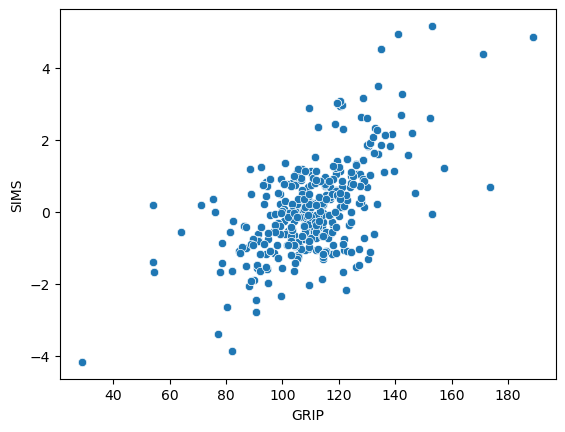

In [60]:
sns.scatterplot(x = 'GRIP', y = 'SIMS', data = df)

## for Ratings :

<IPython.core.display.Javascript object>

<Axes: xlabel='SIMS', ylabel='RATINGS'>

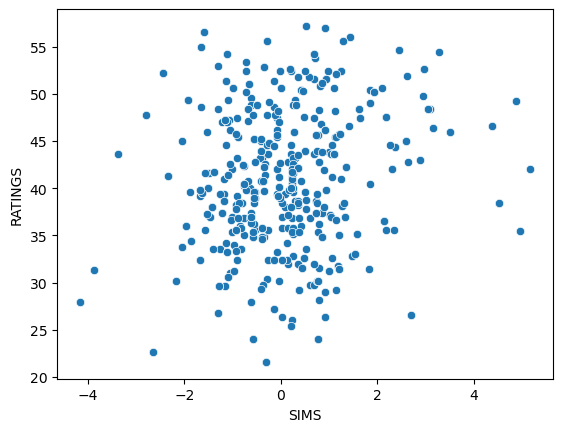

In [62]:
sns.scatterplot(x = 'SIMS', y = 'RATINGS', data = df)

## Regression Plots : 

### for ARM & GRIP : 

<IPython.core.display.Javascript object>

<Axes: xlabel='ARM', ylabel='GRIP'>

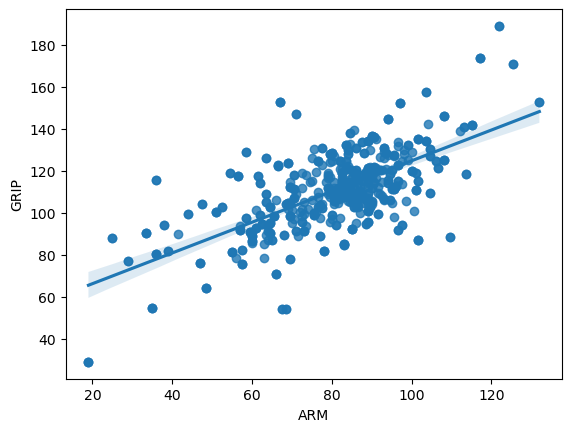

In [63]:
sns.regplot(x = 'ARM', y = 'GRIP', data = df)

### for ARM and SIMS :

<IPython.core.display.Javascript object>

<Axes: xlabel='ARM', ylabel='SIMS'>

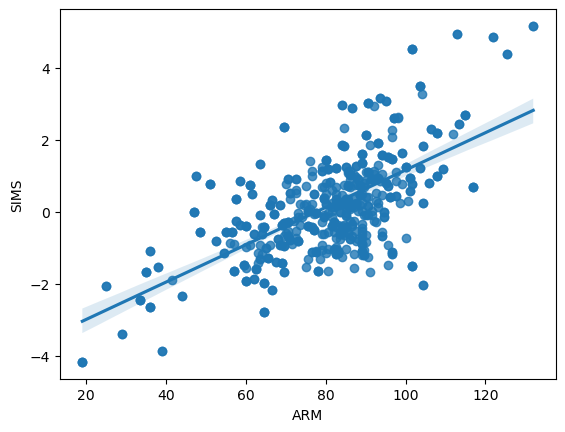

In [64]:
sns.regplot(x = 'ARM', y = 'SIMS', data = df)

## for GRIP and SIMS : 

<IPython.core.display.Javascript object>

<Axes: xlabel='GRIP', ylabel='SIMS'>

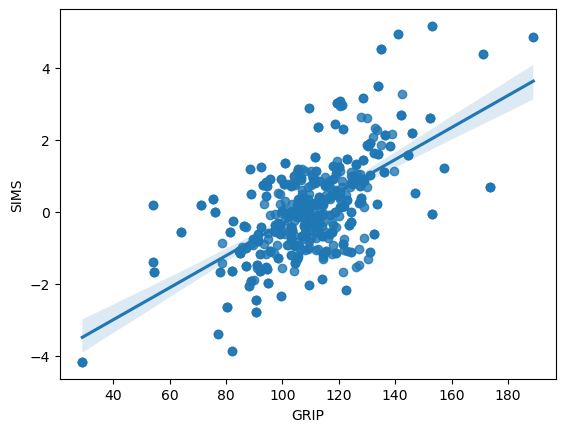

In [65]:
sns.regplot(x = 'GRIP', y = 'SIMS', data = df)

## Heatmap (correlations) :

<IPython.core.display.Javascript object>

<Axes: >

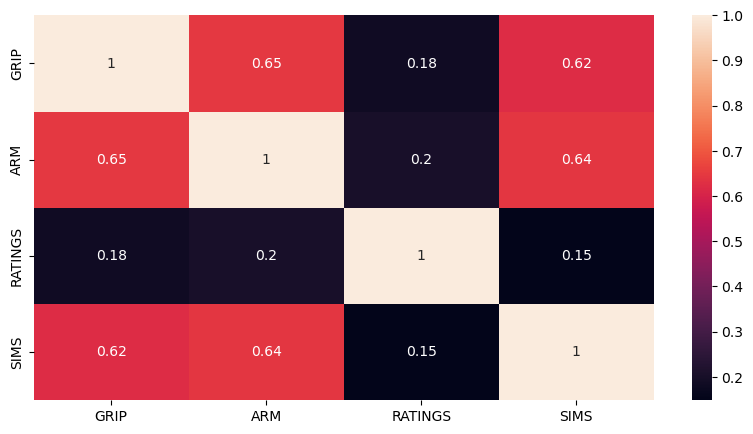

In [86]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot = True)

## Further we analyise with hypothesis tests that if the correlation is true or not. 

## Hypothesis Testing :

### We are going to test the hypothesis of correlation with Pearson correlation test. 

In [68]:
correlation_coefficient, p_value = st.pearsonr(df['ARM'], df['GRIP'])

In [69]:
print(correlation_coefficient, p_value) 

0.6458820251196271 2.017067438997213e-67


## There is a significant  correlation between ARM and GRIP 

In [73]:
correlation_coefficient, p_value = st.pearsonr(df['ARM'], df['SIMS'])

In [74]:
print(correlation_coefficient, p_value) 

0.6410560829899375 3.910962226627131e-66


##   There is a significant  correlation between ARM and SIMS.

In [76]:
correlation_coefficient, p_value = st.pearsonr(df['GRIP'], df['SIMS'])

In [77]:
print(correlation_coefficient, p_value) 

0.6230805463063441 1.552019127482318e-61


## There is a significant  correlation between GRIP and SIMS.

In [78]:
correlation_coefficient, p_value = st.pearsonr(df['RATINGS'], df['GRIP'])

In [79]:
print(correlation_coefficient, p_value) 

0.18468850127218173 1.089227495068502e-05


In [80]:
correlation_coefficient, p_value = st.pearsonr(df['RATINGS'], df['ARM'])

In [81]:
print(correlation_coefficient, p_value) 

0.20391705598504725 1.1388197993122256e-06


In [82]:
correlation_coefficient, p_value = st.pearsonr(df['RATINGS'], df['SIMS'])

In [83]:
print(correlation_coefficient, p_value) 

0.14825951871292595 0.00043139515322012506


## for these three pairs , pvalue < alpha 

## BUT , for these three pairs , the correlation coeffecint is really low , as we found out in the scatterplots . 